# RPhi and Circular Average
This example computes the radial and circular average using RadialBinnedStatistic and RPhiBinnedStatistic.
(Both derivates of `skbeam.core.accumulators.binned_statistic.BinnedStatisticDD`)

See also the scikit-beam-example `construct_rphi_image`

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skbeam.core.accumulators.binned_statistic import RPhiBinnedStatistic,\
        BinnedStatisticDD, RadialBinnedStatistic
from skbeam.core.utils import radial_grid, angle_grid

# Generate some fake data

/home/julienl/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


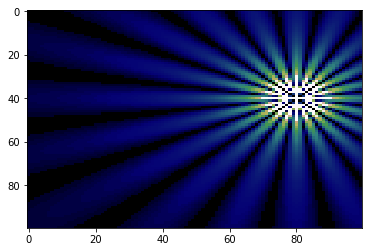

In [48]:
shape = np.array([100, 100])
center = (40, 80)
R = radial_grid(center, shape)
PHI = angle_grid(center, shape)

img = 1/R**2*np.cos(PHI*10)**2

plt.figure(2);plt.clf()
plt.imshow(img);plt.clim(0,.01)

# Compute the RPhi Average and Circular Averages

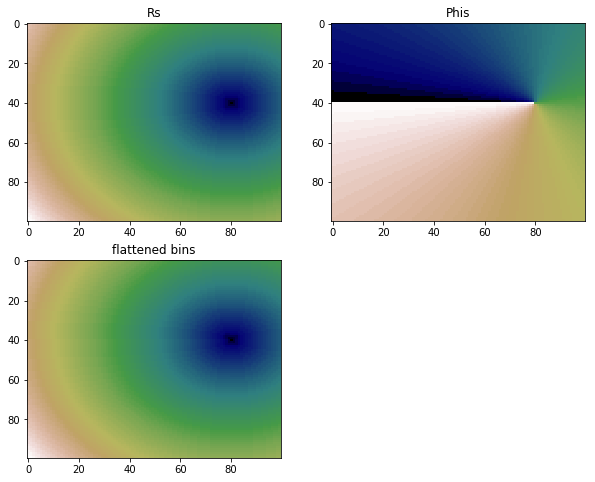

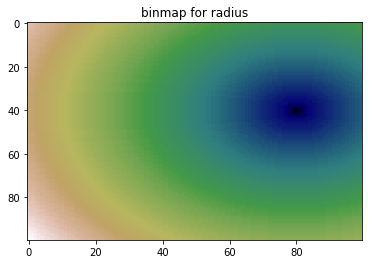

In [49]:
# compute the bins
rphibinstat = RPhiBinnedStatistic(img.shape, origin=center, bins=(100,100))
rbinstat = RadialBinnedStatistic(img.shape, origin=center, bins=100)


binmap_rphi = rphibinstat.binmap.reshape((-1, *img.shape))
binmap_r = rbinstat.binmap.reshape((-1, *img.shape))

plt.figure(3, figsize=(10,8));
plt.clf()
plt.subplot(2,2,1)
plt.title("Rs")
plt.imshow(binmap[0])
plt.subplot(2,2,2)
plt.title("Phis")
plt.imshow(binmap[1])
plt.subplot(2,2,3)
plt.title("flattened bins")
plt.imshow(rs.xy.reshape(shape))

plt.figure(4);plt.clf()
plt.title("binmap for radius")
plt.imshow(binmap_r[0])

# Compute the RPhi and Radial Averages

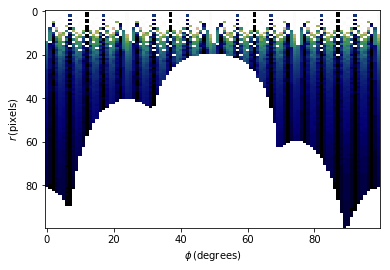

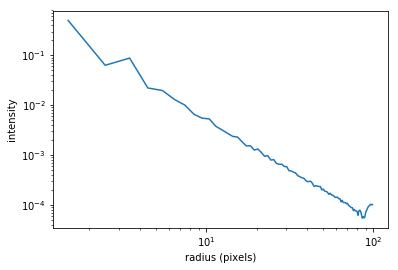

In [52]:
# compute the r-phi average
res_rphi = rphibinstat(img)
plt.figure(4);plt.clf()
plt.imshow(res_rphi);plt.clim(0,.01)
plt.xlabel("$\phi\,$(degrees)")
plt.ylabel("$r\,$(pixels)")

# compute the r-phi average
res_r = rbinstat(img)
plt.figure(5);plt.clf()
plt.loglog(rbinstat.bin_centers, res_r)
plt.xlabel("radius (pixels)")
plt.ylabel("intensity")
